In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os

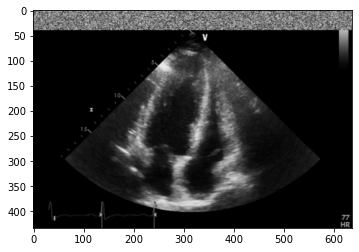

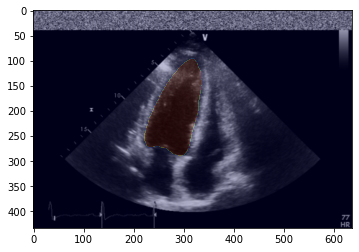

In [27]:
# 원본 이미지
img = plt.imread('data/original/train/A4C/0001.png')
mask = np.load('data/original/train/A4C/0001.npy')
plt.imshow(img)
plt.show()
plt.imshow(img)
plt.imshow(mask, alpha=0.2,cmap='jet')

In [4]:
def remove_topnoise(img, mask):
    cand1 = int(img.shape[1] / 8 * 7)
    cand2 = int(img.shape[1] / 8 * 6)

    cutoff1 = np.where(img[:, cand1, :] < 0.01)[0][0]
    cutoff2 = np.where(img[:, cand2, :] < 0.01)[0][0]


    cutoff_min = np.min([cutoff1, cutoff2])

    return img[cutoff_min:, ], mask[cutoff_min:, ] 


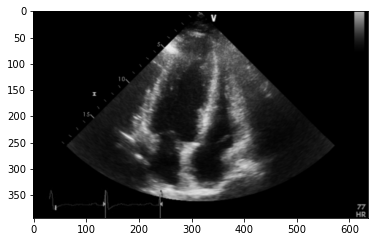

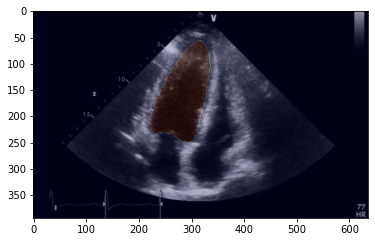

In [24]:
# 상단 노이즈 제거
img = plt.imread('data/original/train/A4C/0001.png')
mask = np.load('data/original/train/A4C/0001.npy')
img, mask = remove_topnoise(img, mask)
plt.imshow(img)
plt.show()
plt.imshow(img)
plt.imshow(mask, alpha=0.2,cmap='jet')

In [7]:
os.makedirs('data/remove_topnoise/train/A2C', exist_ok=True)
os.makedirs('data/remove_topnoise/validation/A2C', exist_ok=True)
os.makedirs('data/remove_topnoise/train/A4C', exist_ok=True)
os.makedirs('data/remove_topnoise/validation/A4C', exist_ok=True)

In [20]:
for mode in ['train', 'validation']:
    for version in ['A2C', 'A4C']:
        print(f'{mode} {version}')
        img_list = os.listdir(f'data/original/{mode}/{version}')
        for img_name in img_list:
            if img_name.endswith('.png'):
                img = plt.imread(f'data/original/{mode}/{version}/' + img_name)
                mask = np.load(f'data/original/{mode}/{version}/' + img_name.replace('png', 'npy'))
                img, mask = remove_topnoise(img, mask)
                plt.imsave(f'data/remove_topnoise/{mode}/{version}/' + img_name, img)
                np.save(f'data/remove_topnoise/{mode}/{version}/' + img_name.replace('png', 'npy'), mask)

In [25]:
from to

SyntaxError: invalid syntax (3770295268.py, line 1)

True


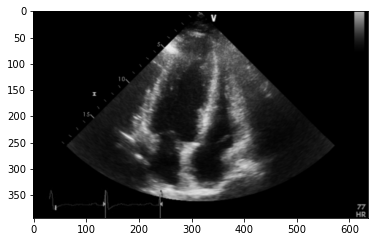

In [121]:
cutoff_img = remove_topnoise(img)

plt.imshow(cutoff_img)

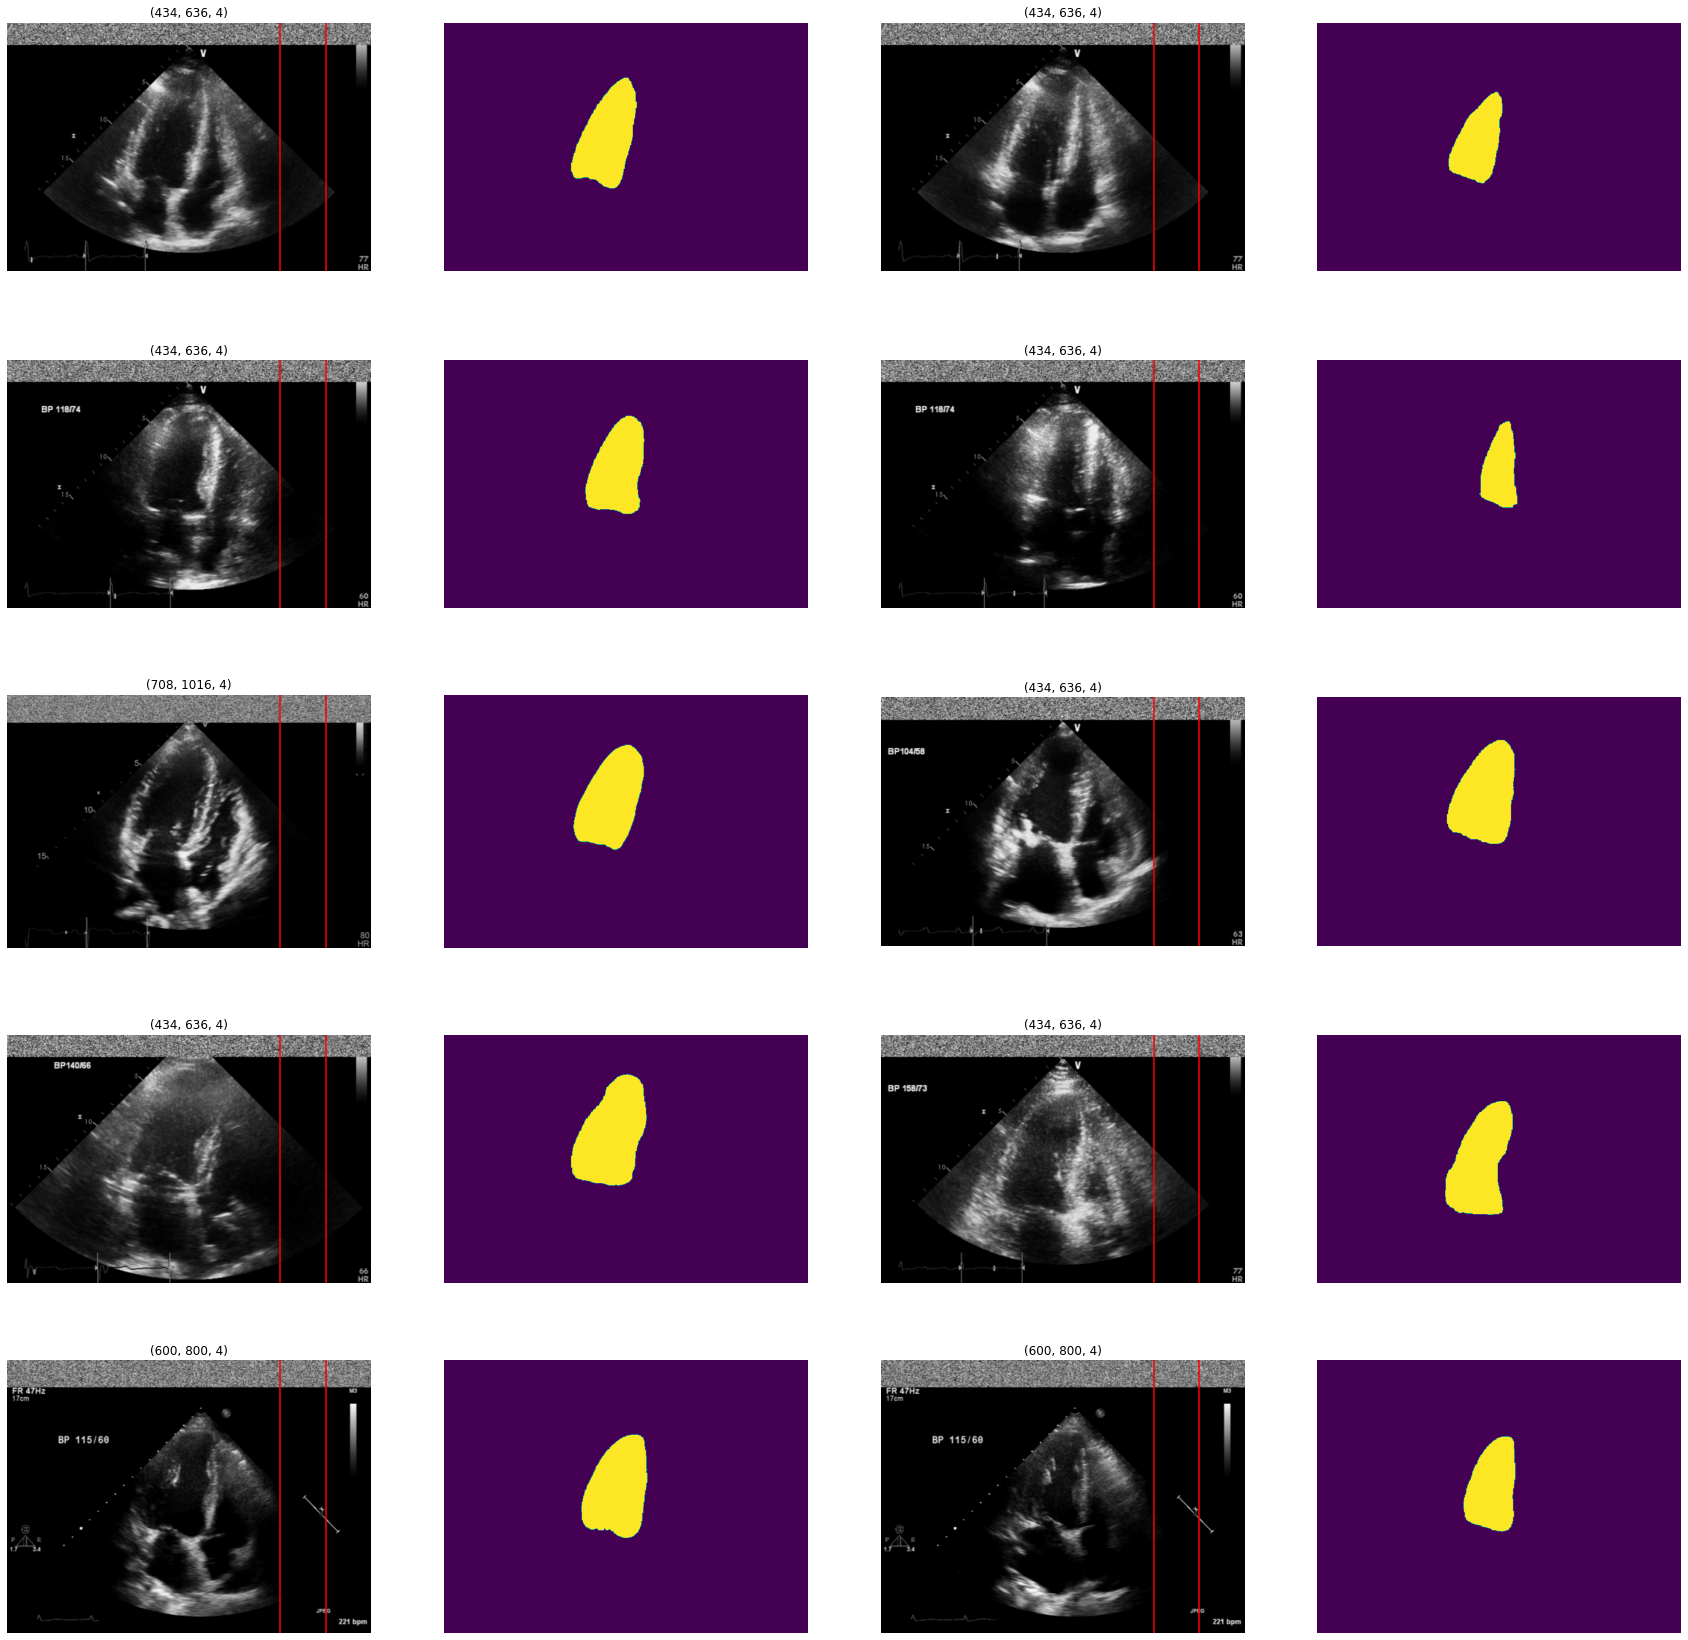

In [107]:
# subplots
fig, ax = plt.subplots(5, 4, figsize=(15*2, 10*3))
ax = ax.ravel()
for i in range(10):
    img = plt.imread('data/train/A4C/{:04d}.png'.format(i+1))
    length = int(img.shape[1] / 8 * 7)
    ax[2*i].axvline(length, color='r')
    length = int(img.shape[1] / 8 * 6)
    ax[2*i].axvline(length, color='r')
    ax[2*i].imshow(img)
    ax[2*i].axis('off')
    ax[2*i].set_title(img.shape)
    img = np.load('data/train/A4C/{:04d}.npy'.format(i+1))
    ax[2*i+1].imshow(img)
    ax[2*i+1].axis('off')

array([0.6       , 0.6627451 , 0.3764706 , 0.30588236, 0.5137255 ,
       0.36078432, 0.5529412 , 0.5803922 , 0.70980394, 0.69411767,
       0.60784316, 0.69411767, 0.5764706 , 0.6745098 , 0.5529412 ,
       0.5372549 , 0.4117647 , 0.30980393, 0.29411766, 0.4       ,
       0.43137255, 0.6117647 , 0.28627452, 0.38431373, 0.6784314 ,
       0.5803922 , 0.2627451 , 0.654902  , 0.7647059 , 0.42745098,
       0.59607846, 0.6431373 , 0.29803923, 0.3254902 , 0.34117648,
       0.3137255 , 0.2901961 , 0.27058825, 0.29411766, 0.39607844,
       0.07450981, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

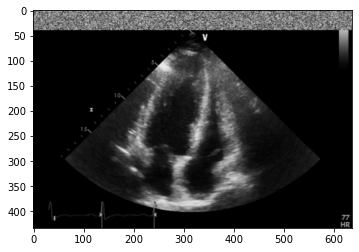

In [101]:
img = plt.imread('data/train/A4C/0001.png')
plt.imshow(img)
plt.imshow(img[:, :, :-1])

img[:, 10, 0]
# img[200, :, 0]

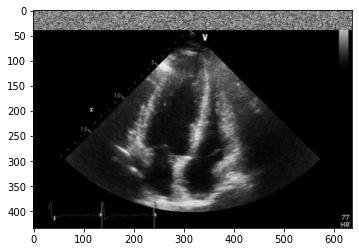

In [83]:
plt.imshow(img[:, :, 0], cmap='gray')

# A4C 데이터 분포

In [19]:
size_list = []
for i in range(800):
    img = plt.imread('data/train/A4C/{:04d}.png'.format(i+1))
    size_list.append(img.shape)

(array([565.,   0.,   0.,   0., 174.,   0.,   0.,   0.,   9.,  52.]),
 array([ 636. ,  674.8,  713.6,  752.4,  791.2,  830. ,  868.8,  907.6,
         946.4,  985.2, 1024. ]),
 <BarContainer object of 10 artists>)

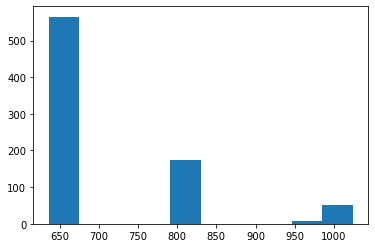

In [20]:
# 해상도 (가로)
plt.hist(np.array(size_list)[:,1])

(array([561.,   4.,   0.,   0.,   0., 174.,   0.,   0.,  54.,   7.]),
 array([422. , 456.6, 491.2, 525.8, 560.4, 595. , 629.6, 664.2, 698.8,
        733.4, 768. ]),
 <BarContainer object of 10 artists>)

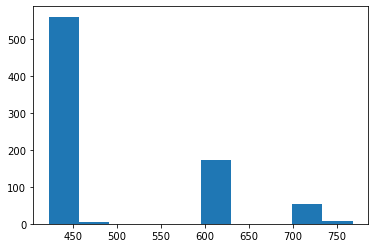

In [21]:
# 해상도 (세로)
plt.hist(np.array(size_list)[:,0])

(array([ 11.,   0., 550.,  45.,   0.,   0.,   0.,   0.,   0., 194.]),
 array([0.66352201, 0.67216981, 0.68081761, 0.68946541, 0.69811321,
        0.70676101, 0.71540881, 0.7240566 , 0.7327044 , 0.7413522 ,
        0.75      ]),
 <BarContainer object of 10 artists>)

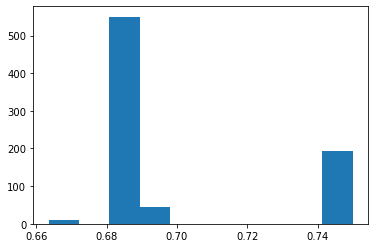

In [22]:
# 가로 대비 세로 비율
plt.hist(np.array(size_list)[:,0] / np.array(size_list)[:,1])

(array([ 63., 164., 200., 177., 111.,  46.,  20.,  11.,   2.,   6.]),
 array([0.01637176, 0.02599846, 0.03562516, 0.04525186, 0.05487856,
        0.06450526, 0.07413196, 0.08375866, 0.09338536, 0.10301206,
        0.11263876]),
 <BarContainer object of 10 artists>)

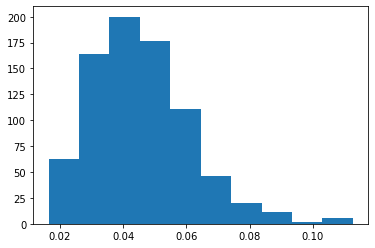

In [23]:
# 전체 대비 마스크 크기 비율
mask_list = []
for i in range(800):
    img = np.load('data/train/A4C/{:04d}.npy'.format(i+1))
    mask_list.append(img.sum() / img.size)
plt.hist(mask_list)

In [84]:
# 전체 대비 마스크 크기 비율
mask_list = []
for i in range(800):
    img = np.load('data/train/A4C/{:04d}.npy'.format(i+1))
    mask_list.append(img)

In [85]:
sum_mask = np.sum(mask_list)
sum_mask.shape

/home/kang/anaconda3/envs/torch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: operands could not be broadcast together with shapes (434,636) (708,1016) 

# A2C 데이터 분포

In [91]:
size_list = []
for i in range(800):
    img = plt.imread('data/train/A2C/{:04d}.png'.format(i+1))
    size_list.append(str(img.shape[:2]))

In [92]:
np.unique(np.array(size_list), return_counts=True)

(array(['(422, 636)', '(434, 636)', '(480, 640)', '(600, 800)',
        '(708, 1016)', '(720, 960)', '(768, 1024)'], dtype='<U11'),
 array([  9, 558,   2, 177,  39,   6,   9]))

(array([569.,   0.,   0.,   0., 177.,   0.,   0.,   0.,   6.,  48.]),
 array([ 636. ,  674.8,  713.6,  752.4,  791.2,  830. ,  868.8,  907.6,
         946.4,  985.2, 1024. ]),
 <BarContainer object of 10 artists>)

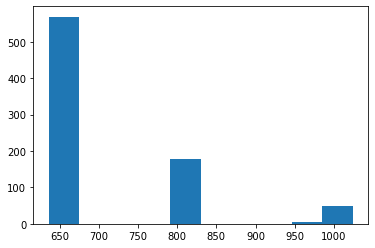

In [25]:
# 해상도 (가로)
plt.hist(np.array(size_list)[:,1])

(array([567.,   2.,   0.,   0.,   0., 177.,   0.,   0.,  45.,   9.]),
 array([422. , 456.6, 491.2, 525.8, 560.4, 595. , 629.6, 664.2, 698.8,
        733.4, 768. ]),
 <BarContainer object of 10 artists>)

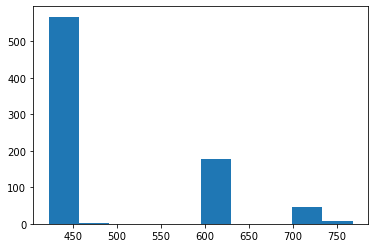

In [26]:
# 해상도 (세로)
plt.hist(np.array(size_list)[:,0])

(array([  9.,   0., 558.,  39.,   0.,   0.,   0.,   0.,   0., 194.]),
 array([0.66352201, 0.67216981, 0.68081761, 0.68946541, 0.69811321,
        0.70676101, 0.71540881, 0.7240566 , 0.7327044 , 0.7413522 ,
        0.75      ]),
 <BarContainer object of 10 artists>)

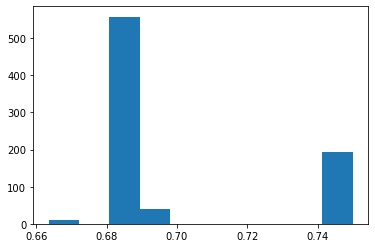

In [27]:
# 가로 대비 세로 비율
plt.hist(np.array(size_list)[:,0] / np.array(size_list)[:,1])

(array([ 22., 182., 270., 170.,  94.,  36.,  16.,   6.,   1.,   3.]),
 array([0.01247355, 0.02339579, 0.03431803, 0.04524027, 0.05616251,
        0.06708475, 0.07800698, 0.08892922, 0.09985146, 0.1107737 ,
        0.12169594]),
 <BarContainer object of 10 artists>)

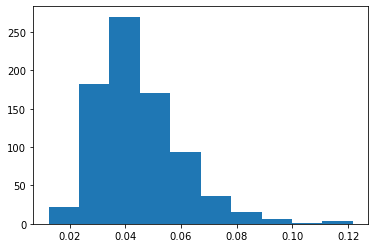

In [28]:
# 전체 대비 마스크 크기 비율
mask_list = []
for i in range(800):
    img = np.load('data/train/A2C/{:04d}.npy'.format(i+1))
    mask_list.append(img.sum() / img.size)
plt.hist(mask_list)

In [48]:
i = 100
img = plt.imread('data/train/A2C/{:04d}.png'.format(i+1))


In [51]:
# 이미지의 채널 수: 4
print('이미지 shape:',img.shape)
# 마지막 채널은 전부 1
print('4번째 채널의 값 분포:', np.unique(img[:,:,3], return_counts=True))

이미지 shape: (434, 636, 4)
4번째 채널의 값 분포: (array([1.], dtype=float32), array([276024]))


In [62]:
# 흑백 이미지
np.sum(img[:,:,0] != img[:,:,1]), np.sum(img[:,:,1] != img[:,:,2])

(0, 0)

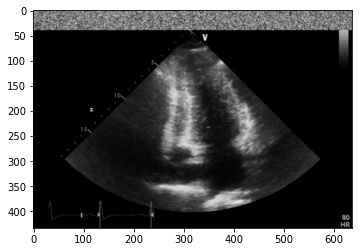

In [30]:
plt.imshow(img)

In [ ]:
# 전처리를 어떻게 할지
a